In [ ]:
# clean the year, can be used.

df['year_check']=df['Games'].apply(lambda x: int(x.split(' ')[0]))
df[df['year_check'] != df['Year']]
df['Year'] = df['year_check']
df = df.drop(columns = 'year_check')

In [ ]:
#  Players with different ID but have the same name. Suggest to use ID instead of name.  This can be used.
df.groupby('Name').count().shape
df.groupby('ID').count().shape

In [ ]:
# If no information, then all rows of the same ID has no information for the Height, Weight and Age.
df3 = df.groupby('ID').count().reset_index()
df3[(df3['Name'] != df3['Height']) & (df3['Height']>0)]
df3[(df3['Name'] != df3['Weight']) & (df3['Weight']>0)]
df3[(df3['Name'] > df3['Age']) & (df3['Age']>0)]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
url = "https://github.com/jacquesstimolo/Group_Project_ML/blob/main/athlete_events.csv"
data = pd.read_csv(url)

ParserError: ignored

In [ ]:
url = "/content/athlete_events.csv"
data2 = pd.read_csv(url)


In [ ]:
df = data2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239978 entries, 0 to 239977
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      239978 non-null  int64  
 1   Name    239978 non-null  object 
 2   Sex     239978 non-null  object 
 3   Age     231539 non-null  float64
 4   Height  186579 non-null  float64
 5   Weight  184098 non-null  float64
 6   Team    239978 non-null  object 
 7   NOC     239978 non-null  object 
 8   Games   239978 non-null  object 
 9   Year    239978 non-null  int64  
 10  Season  239977 non-null  object 
 11  City    239977 non-null  object 
 12  Sport   239977 non-null  object 
 13  Event   239977 non-null  object 
 14  Medal   34945 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 27.5+ MB


In [ ]:
df.shape

(239978, 15)

In [ ]:
df.isna().sum() # gives the sum of the null values preset in the dataset column-wise.

ID             0
Name           0
Sex            0
Age         8439
Height     53399
Weight     55880
Team           0
NOC            0
Games          0
Year           0
Season         1
City           1
Sport          1
Event          1
Medal     205033
dtype: int64

In [ ]:
df.isna().any().sum()

8

In [ ]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
239973,120250,Peter Tich,M,31.0,178.0,68.0,Slovakia,SVK,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's 50 kilometres Walk,NaN
239974,120251,Milan Tii,M,28.0,197.0,95.0,Montenegro,MNE,2008 Summer,2008,Summer,Beijing,Water Polo,Water Polo Men's Water Polo,NaN
239975,120252,Edward James Tickell,M,51.0,NaN,NaN,Great Britain,GBR,1912 Summer,1912,Summer,Stockholm,Shooting,"Shooting Men's Free Pistol, 50 metres",NaN
239976,120253,Antti Sakari Tickln,M,29.0,175.0,70.0,Finland,FIN,1988 Winter,1988,Winter,Calgary,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
239977,120254,"Charles Frederick ""Charlie"" Tickner",M,26.0,NaN,NaN,United States,USA,1980 Winter,19,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


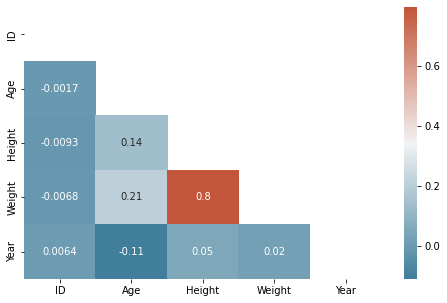

In [ ]:
# Correlation between different variables
corr = df.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(8, 5))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

 **Age**

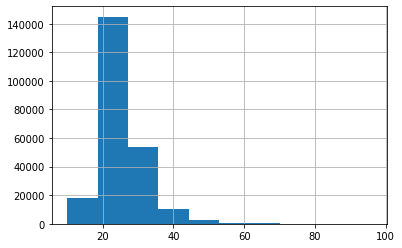

In [ ]:
df['Age'].hist( )

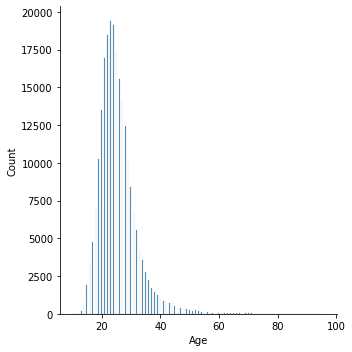

In [ ]:
sns.displot(df['Age'])

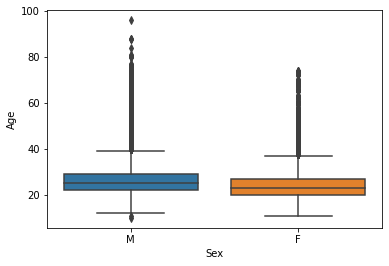

In [ ]:
sns.boxplot(y='Age', x='Sex', data=df);

In [ ]:
Art = df[(df['Sport']=='Art Competitions')]

In [ ]:
Art

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
58,19,Win Valdemar Aaltonen,M,54.0,NaN,NaN,Finland,FIN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
669,389,Adolf Gaston Abel,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN
670,389,Adolf Gaston Abel,M,45.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN
1203,677,Georges Achille-Fould,F,55.0,NaN,NaN,France,FRA,1924 Summer,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Painting,NaN
1251,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239004,119818,Georg Hugo Kurt Thomas,M,32.0,NaN,NaN,Germany,GER,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Music, Compositions For...",Silver
239406,119993,Alfred Reginald Thomson,M,53.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",Gold
239456,120015,Rodney F. Thomson,M,53.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
239495,120031,Josef Thorak,M,43.0,NaN,NaN,Austria,AUT,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN


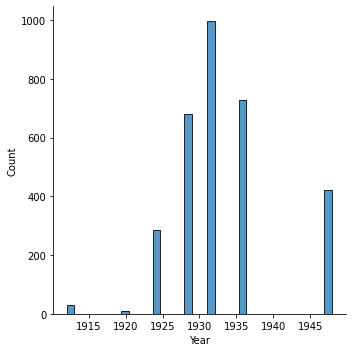

In [ ]:
sns.displot(Art['Year'])

**ID**

In [ ]:
df['Born']=df['Year']-df['Age']

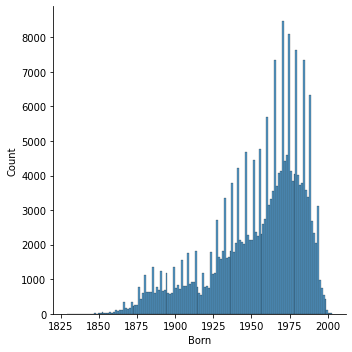

In [ ]:
sns.displot(df['Born'])

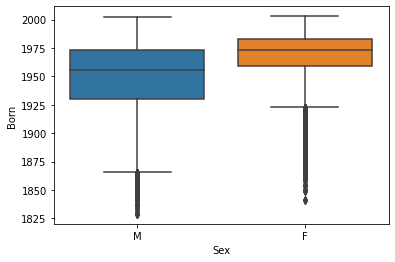

In [ ]:
sns.boxplot(y='Born', x='Sex', data=df);

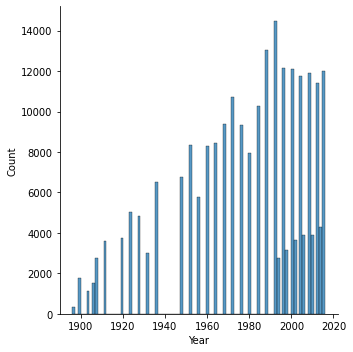

In [ ]:
sns.displot(df['Year'])

In [ ]:
df['Games'][0].split(' ')[0]

'1992'

In [ ]:
df['year_check']=df['Games'].apply(lambda x: int(x.split(' ')[0]))

In [ ]:
df[df['year_check'] != df['Year']]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Born,year_check
239977,120254,"Charles Frederick ""Charlie"" Tickner",M,26.0,NaN,NaN,United States,USA,1980 Winter,19,NaN,NaN,NaN,NaN,NaN,-7.0,1980


In [ ]:
df['Year'] = df['year_check']

**ID**

In [ ]:
df2 = df[df.duplicated(['ID'], keep=False)]

In [ ]:
df2

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Born,year_check
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,1967.0,1988
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,1967.0,1988
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,1967.0,1992
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,1967.0,1992
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,1967.0,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239962,120242,Stefano Ticci,M,29.0,188.0,85.0,Italy-1,ITA,1992 Winter,1992,Winter,Albertville,Bobsleigh,Bobsleigh Men's Four,NaN,1963.0,1992
239963,120242,Stefano Ticci,M,31.0,188.0,85.0,Italy-1,ITA,1994 Winter,1994,Winter,Lillehammer,Bobsleigh,Bobsleigh Men's Two,Bronze,1963.0,1994
239964,120242,Stefano Ticci,M,31.0,188.0,85.0,Italy-2,ITA,1994 Winter,1994,Winter,Lillehammer,Bobsleigh,Bobsleigh Men's Four,NaN,1963.0,1994
239972,120250,Peter Tich,M,27.0,178.0,68.0,Slovakia,SVK,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 50 kilometres Walk,NaN,1969.0,1996


In [ ]:
df.drop(columns=['Name', 'Team', 'NOC', 'Games', 'City', 'Event'])

,ID,Sex,Age,Height,Weight,Year,Season,Sport,Medal,Born,year_check
0,1,M,24.0,180.0,80.0,1992,Summer,Basketball,NaN,1968.0,1992
1,2,M,23.0,170.0,60.0,2012,Summer,Judo,NaN,1989.0,2012
2,3,M,24.0,NaN,NaN,1920,Summer,Football,NaN,1896.0,1920
3,4,M,34.0,NaN,NaN,1900,Summer,Tug-Of-War,Gold,1866.0,1900
4,5,F,21.0,185.0,82.0,1988,Winter,Speed Skating,NaN,1967.0,1988
...,...,...,...,...,...,...,...,...,...,...,...
239973,120250,M,31.0,178.0,68.0,2000,Summer,Athletics,NaN,1969.0,2000
239974,120251,M,28.0,197.0,95.0,2008,Summer,Water Polo,NaN,1980.0,2008
239975,120252,M,51.0,NaN,NaN,1912,Summer,Shooting,NaN,1861.0,1912
239976,120253,M,29.0,175.0,70.0,1988,Winter,Cross Country Skiing,NaN,1959.0,1988


Players with different ID but have the same name. Suggest to use ID instead of name.

If no information, then all rows of the same ID has no information for the Height, Weight and Age.*italicized text*

In [ ]:
df.groupby('Name').count().shape

(119556, 16)

In [ ]:
df3 = df.groupby('ID').count().reset_index()

In [ ]:
df3[(df3['Name'] != df3['Height']) & (df3['Height']>0)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Born,year_check


In [ ]:
df3[(df3['Name'] != df3['Weight']) & (df3['Weight']>0)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Born,year_check


In [ ]:
df3[(df3['Name'] > df3['Age']) & (df3['Age']>0)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Born,year_check


In [ ]:
df3[df3['Name'] != df3['Height']]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Born,year_check
2,3,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1
3,4,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1
9,10,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1
14,15,5,5,5,0,0,5,5,5,5,5,5,5,5,2,5,5
18,19,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120240,120241,13,13,0,0,0,13,13,13,13,13,13,13,13,0,0,13
120244,120245,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1
120248,120249,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1
120251,120252,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1


In [ ]:
winter = df[df['Year']==2014]['Sport'].unique()
winter

array(['Ice Hockey', 'Alpine Skiing', 'Figure Skating',
       'Freestyle Skiing', 'Biathlon', 'Curling', 'Cross Country Skiing',
       'Ski Jumping', 'Luge', 'Short Track Speed Skating', 'Snowboarding',
       'Speed Skating', 'Skeleton', 'Bobsleigh', 'Nordic Combined'],
      dtype=object)

In [ ]:
len(winter)

15

In [ ]:
summer = df[df['Year']==2016]['Sport'].unique()
summer 

array(['Weightlifting', 'Gymnastics', 'Athletics', 'Rowing', 'Taekwondo',
       'Handball', 'Boxing', 'Equestrianism', 'Cycling', 'Volleyball',
       'Diving', 'Shooting', 'Judo', 'Football', 'Synchronized Swimming',
       'Wrestling', 'Fencing', 'Swimming', 'Badminton', 'Rugby Sevens',
       'Table Tennis', 'Water Polo', 'Trampolining', 'Basketball',
       'Triathlon', 'Modern Pentathlon', 'Sailing', 'Beach Volleyball',
       'Golf', 'Rhythmic Gymnastics', 'Archery', 'Hockey', 'Canoeing',
       'Tennis'], dtype=object)

In [ ]:
len(summer)

34

In [ ]:
X = df.drop(columns=['Medal'])
y = df['Medal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train.shape, X_test.shape

categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features = X_train.select_dtypes(include=['int', 'float']).columns.tolist()

categorical_transformer = Pipeline(steps=[
                                          # ("cat_imputer", SimpleImputer(strategy='constant',
                                          #                               fill_value='Not Available')),
                                          ("onehot", OneHotEncoder(handle_unknown="ignore"))
                                          ])

# numeric_transformer = Pipeline(steps=[
#                                       ("knn_imputer", KNNImputer(n_neighbors=5)) # no standard scaling for numeric data
#                                       ])

preprocessor_new = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer, 
                                                       numeric_features),
                                               ("cat", categorical_transformer, 
                                                       categorical_features)
                                               ])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf

In [ ]:
pipeline_rf = Pipeline([("pre_process", preprocessor_new), 
                         ("model", rf)])
pipeline_rf

In [ ]:
import str.split from pandas

SyntaxError: ignored